In [2]:
#Librerias a utilizar
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
# lectura de la data de test
df_heart = pd.read_csv('train_test.csv', index_col=0)
df_heart.head(10)
df_heart.describe()
df_heart.drop('famhist', axis=1, inplace=True)
df_heart

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
id,,,,,,,,,
1,110,4.64,4.55,30.46,48,30.90,15.22,46,0
2,124,4.82,3.24,21.10,48,28.49,8.42,30,0
3,154,1.40,1.72,18.86,58,22.67,43.20,59,0
4,168,11.40,5.08,26.66,56,27.04,2.61,59,1
5,118,0.00,1.88,10.05,59,21.57,0.00,17,0
...,...,...,...,...,...,...,...,...,...
364,148,0.50,5.97,32.88,54,29.27,6.43,42,0
365,154,0.00,4.81,28.11,56,25.67,75.77,59,0
366,117,1.53,2.44,28.95,35,25.89,30.03,46,0


In [9]:
df_heart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,137.872283,3.468668,4.706386,25.185435,53.000000,25.974457,16.995027,41.633152,0.317935
std,19.568158,4.441553,2.110390,7.811632,9.717817,4.039418,24.414541,14.789483,0.466308
min,101.000000,0.000000,0.980000,7.120000,13.000000,17.750000,0.000000,15.000000,0.000000
25%,124.000000,0.015000,3.240000,19.555000,47.000000,22.932500,0.475000,30.000000,0.000000
50%,134.000000,1.615000,4.305000,25.810000,53.000000,25.710000,7.710000,43.000000,0.000000
75%,148.000000,5.085000,5.685000,30.980000,59.250000,28.402500,23.525000,55.000000,1.000000
max,218.000000,25.010000,15.330000,42.170000,78.000000,46.580000,145.290000,64.000000,1.000000


In [10]:
seed = 52
# se hace split de la info de test y de entrenamiento
y = df_heart.pop('chd')
X_train, X_test, y_train, y_test = train_test_split(df_heart, y, test_size=0.2, random_state=seed)

In [12]:
#modelo de clasificación binaria simple
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

# Puntaje del set de entrenamiento
train_score = model.score(X_train, y_train) * 100

# Puntaje del set de test
test_score = model.score(X_test, y_test) * 100

print("Puntaje del set de entrenamiento: %2.1f%%n" % train_score)
print("Puntaje del set de test: %2.1f%%n" % test_score)

Training variance explained: 76.9%n
Test variance explained: 66.2%n


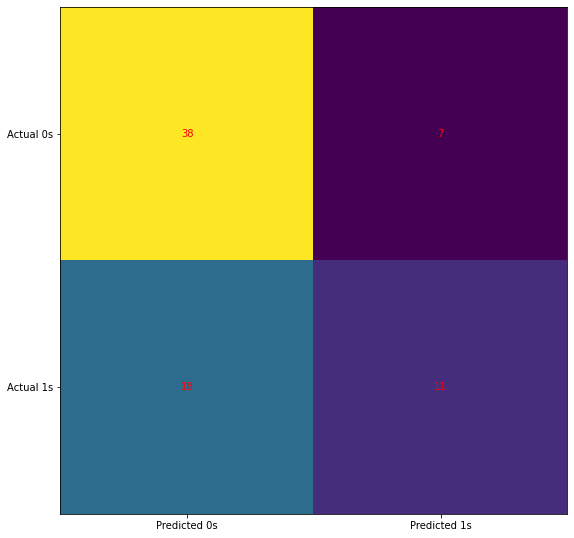

In [14]:
# Matriz de Confusion
cm = confusion_matrix(y_test, model.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.tight_layout()

C:\Users\Manuel Santos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


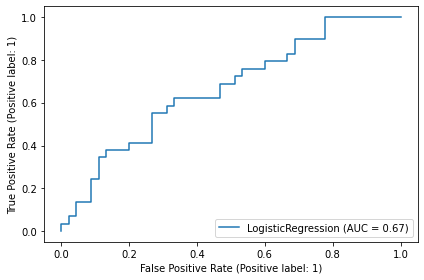

In [17]:
# Plot the ROC curve
model_ROC = plot_roc_curve(model, X_test, y_test)
plt.tight_layout()

In [18]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75        45
           1       0.61      0.38      0.47        29

    accuracy                           0.66        74
   macro avg       0.64      0.61      0.61        74
weighted avg       0.65      0.66      0.64        74

